# **KLASIFIKASI GERAK PUKULAN BULU TANGKIS BERBASIS SPEKTROGRAM MENGGUNAKAN METODE CONVOLUTIONAL NEURAL NETWORK**

## **Menghubungkan Google Drive ke Google Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Mengimport Libraries Yang dibutuhkan**

In [ ]:
import librosa
import os
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Audio
import tensorflow as tf
from skimage.transform import resize
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

## **Menampilkan Data Audio Dari Masing Masing Jenis Pukulan**

### **Audio Smash**

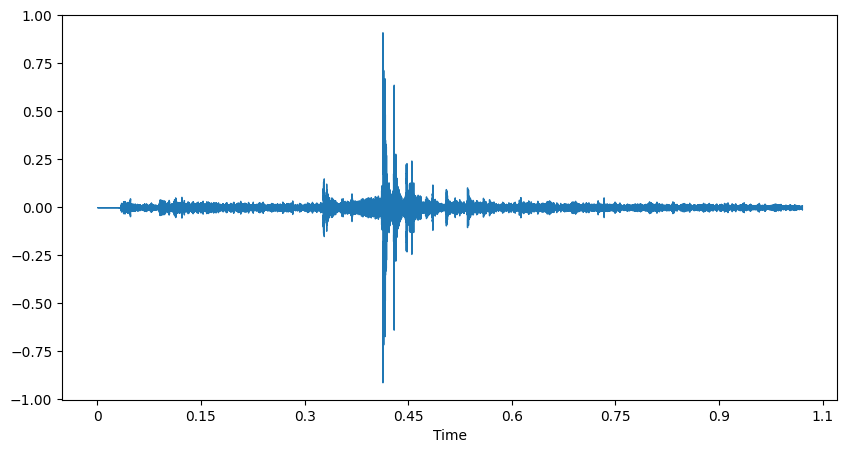

In [ ]:
random_file = "/content/drive/My Drive/TUGAS AKHIR/_DATASET_/Audio Pro/Audio Smash/Smash-250.wav"


y, sr = librosa.load(random_file, sr=44100)
plt.figure(figsize=(10,5))
librosa.display.waveshow(y, sr=sr)


Audio(data = y, rate = sr)

### **Audio Dropshot**

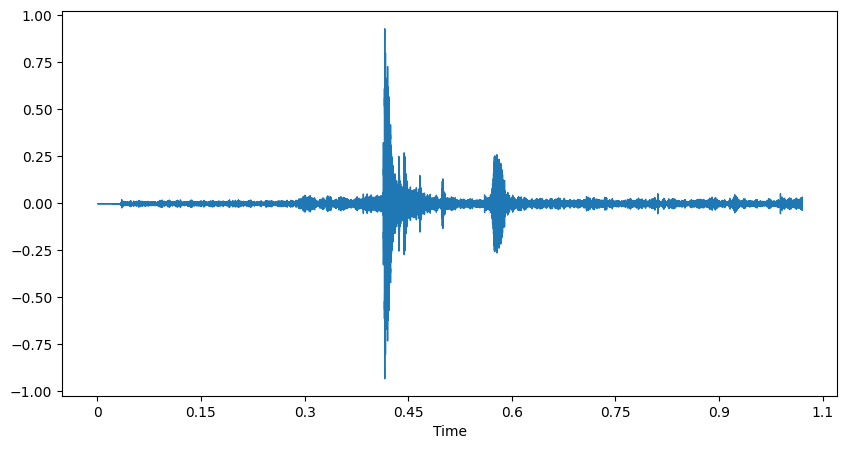

In [ ]:
random_file = "/content/drive/My Drive/TUGAS AKHIR/_DATASET_/Audio Pro/Audio Dropshot/Dropshot-250.wav"

y, sr = librosa.load(random_file, sr=44100)
plt.figure(figsize=(10,5))
librosa.display.waveshow(y, sr=sr)


Audio(data = y, rate = sr)

## **Ekstrasi Fitur Spektrogram**

In [ ]:
def plot_melspectrogram(y, sr):
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

    #Power Referensi max
    print("\nPower max spectrogram:")
    print(np.max(spectrogram))

    #skala Mel
    print("\nSpectrogram dalam skala Mel:")
    print(spectrogram)
    # skala dB
    print("\nSpectrogram dalam skala dB:")
    print(spectrogram_db)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%2.0f dB')
    plt.title('Spectrogram')
    plt.tight_layout()
    plt.show()

    print("Shape:", spectrogram.shape)


### **Spektrogram Audio Smash**


Power max spectrogram:
5.193448

Spectrogram dalam skala Mel:
[[0.0000000e+00 1.0113117e-09 6.2244141e-04 ... 2.3864664e-05
  1.0389063e-05 3.6202505e-04]
 [0.0000000e+00 1.6964850e-09 1.1176768e-03 ... 5.7445030e-04
  2.0843394e-04 6.8630272e-04]
 [0.0000000e+00 2.2325097e-09 1.2866346e-03 ... 2.7496296e-03
  1.7740935e-03 2.4522387e-03]
 ...
 [0.0000000e+00 9.5906594e-13 5.3134597e-10 ... 2.7642753e-09
  4.2647628e-09 4.4046752e-07]
 [0.0000000e+00 1.1470393e-12 5.1439675e-10 ... 3.8256003e-09
  3.1648362e-09 4.2518502e-07]
 [0.0000000e+00 6.9362452e-13 4.3882503e-10 ... 3.2119747e-09
  3.9817061e-09 4.2098355e-07]]

Spectrogram dalam skala dB:
[[-80.       -80.       -39.213573 ... -53.377007 -56.988792 -41.56717 ]
 [-80.       -80.       -36.671394 ... -39.56203  -43.96487  -38.789402]
 [-80.       -80.       -36.060005 ... -32.761818 -34.66479  -33.25893 ]
 ...
 [-80.       -80.       -80.       ... -80.       -80.       -70.71542 ]
 [-80.       -80.       -80.       ... -80.    

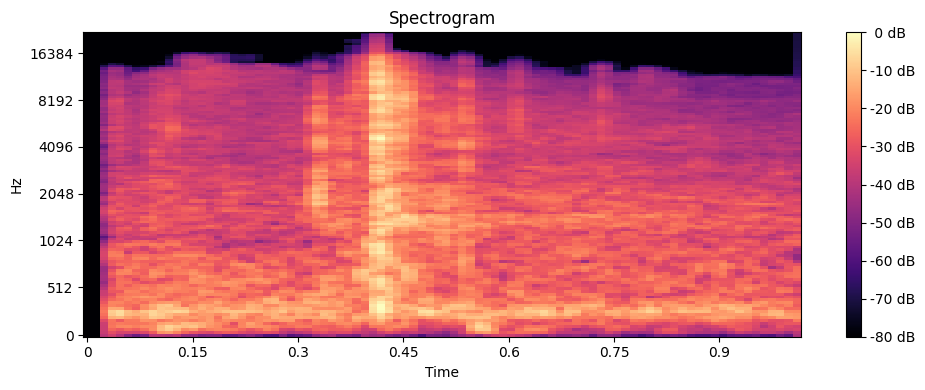

Shape: (128, 88)


In [ ]:
y, sr = librosa.load("/content/drive/My Drive/TUGAS AKHIR/_DATASET_/Audio Pro/Audio Smash/Smash-250.wav", sr= 44100)
plot_melspectrogram (y,sr)

### **Spektrogram Audio Dropshot**


Power max spectrogram:
17.789818

Spectrogram dalam skala Mel:
[[0.0000000e+00 9.1429831e-07 2.0091875e-02 ... 5.0221366e-05
  1.0518216e-04 7.1158481e-04]
 [0.0000000e+00 1.0595642e-06 3.3778582e-02 ... 6.8370620e-04
  6.3404889e-04 9.3011121e-04]
 [0.0000000e+00 9.4964332e-07 3.2112569e-02 ... 5.2665318e-03
  4.7046868e-03 1.1973025e-03]
 ...
 [0.0000000e+00 3.1560924e-12 4.0327794e-09 ... 2.5135880e-09
  4.0298054e-09 8.1904039e-07]
 [0.0000000e+00 1.6412602e-12 6.8353651e-10 ... 2.5377609e-09
  3.2009766e-09 7.3810173e-07]
 [0.0000000e+00 1.4855403e-12 5.4886512e-10 ... 3.5277787e-09
  3.2559122e-09 6.8768361e-07]]

Spectrogram dalam skala dB:
[[-80.       -72.89084  -29.471512 ... -55.49283  -52.282295 -43.97945 ]
 [-80.       -72.25044  -27.215302 ... -44.15302  -44.480488 -42.81637 ]
 [-80.       -72.72611  -27.434967 ... -35.28647  -35.77641  -41.719677]
 ...
 [-80.       -80.       -80.       ... -80.       -80.       -73.36866 ]
 [-80.       -80.       -80.       ... -80.   

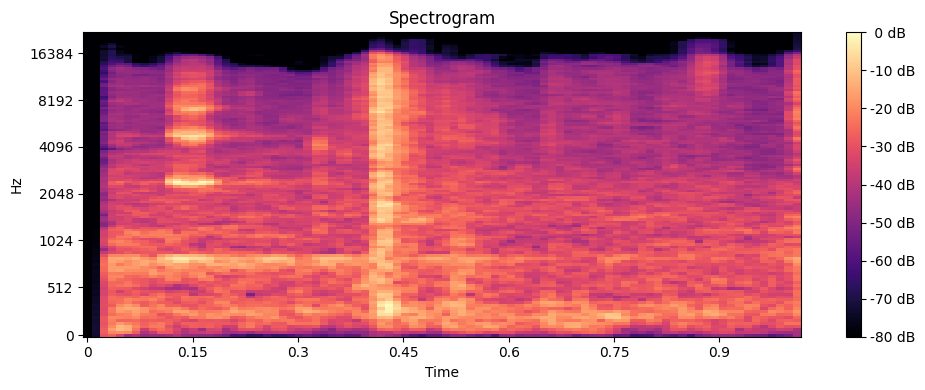

Shape: (128, 88)


In [ ]:
y, sr = librosa.load("/content/drive/My Drive/TUGAS AKHIR/_DATASET_/Audio Pro/Audio Dropshot/Dropshot-350.wav", sr= 44100)
plot_melspectrogram (y,sr)

## **Data Preprocessing**

In [ ]:
# Define folder structure
data_dir = "/content/drive/My Drive/TUGAS AKHIR/_DATASET_/Audio Pro"
classes = ["Audio Smash", "Audio Dropshot"]

### **Labeling Data Berdasarkan Folder**

In [ ]:
def load_and_preprocess_data(data_dir, classes, target_shape=(128, 128)):
    data = []
    labels = []

    for i_class, class_name in enumerate(classes): # i_class = 0 untuk "Audio Smash", 1 untuk "Audio Dropshot"
        class_dir = os.path.join(data_dir, class_name)
        print('Processing --', class_name)

        if not os.path.exists(class_dir):
            print(f"Folder tidak ditemukan: {class_dir}")
            continue

        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir, filename)

                try:
                    audio_data, sample_rate = librosa.load(file_path, sr=None)
                except Exception as e:
                    print(f"Gagal memuat file: {file_path}, Error: {e}")
                    continue

                spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
                spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
                spectrogram = resize(spectrogram, target_shape)
                spectrogram = np.expand_dims(spectrogram, axis=-1)

                data.append(spectrogram)
                labels.append(i_class)  # Label otomatis sesuai urutan folder

    data = np.array(data)
    labels = np.array(labels)
    return data, labels

In [ ]:
data, labels = load_and_preprocess_data(data_dir, classes, target_shape=(128, 88))

Processing -- Audio Smash
Processing -- Audio Dropshot


In [ ]:
print(f"Jumlah data Smash: {np.sum(labels == 0)}")
print(f"Jumlah data Dropshot: {np.sum(labels == 1)}")

Jumlah data Smash: 500
Jumlah data Dropshot: 500


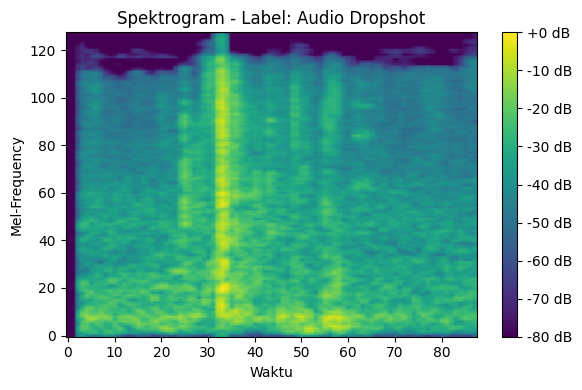

In [ ]:
# Visualisasi
plt.figure(figsize=(6, 4))
plt.imshow(data[0].squeeze(),  aspect='auto', origin='lower', cmap='viridis')  # .squeeze() untuk buang channel
plt.title(f'Spektrogram - Label: {classes[labels[999]]}')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Waktu')
plt.ylabel('Mel-Frequency')
plt.tight_layout()
plt.show()

### **Pembagian Dataset: Train & Test**

In [ ]:
from sklearn.model_selection import train_test_split
# Bagi data menjadi training dan test set
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)
# Periksa bentuk data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (800, 128, 88, 1)
y_train shape: (800,)


In [ ]:
from tensorflow.keras.utils import to_categorical

if y_train.ndim > 1 and y_train.shape[1] > 1:
    y_train = np.argmax(y_train, axis=1)
    y_val = np.argmax(y_val, axis=1)

y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)

print("y_train sample:\n", y_train[:5])
print("y_val sample:\n", y_val[:5])
print("Shape y_train:", y_train.shape)
print("Shape y_val:", y_val.shape)

y_train sample:
 [[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]
y_val sample:
 [[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]
Shape y_train: (800, 2)
Shape y_val: (200, 2)


## **Merancang Model Arsitektur CNN**

In [ ]:
# Reset session
tf.keras.backend.clear_session()

# Arsitektur Model
model = Sequential([
    Input(shape=(128, 88, 1)),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(2, activation='softmax')
])

In [ ]:
# Cetak summary model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 88, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 88, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 44, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 44, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 44, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 22, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 22, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 22528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,883,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,977,538 (11.36 MB)

 Trainable params: 2,977,090 (11.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Kompilasi model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Menambahkan EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss',  # Memantau 'val_loss'
                               patience=10,  # Berhenti jika 'val_loss' tidak membaik dalam 10 epoch
                               restore_best_weights=True,  # Mengembalikan bobot model ke kondisi terbaik
                               verbose=1)  # Menampilkan log proses

# Melatih model dengan early stopping
history = model.fit(X_train, y_train,
                    epochs=30,  # Jumlah epoch
                    batch_size=32,  # Ukuran batch
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])  # Menambahkan early stopping callback


Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.5352 - loss: 1.8900 - val_accuracy: 0.5000 - val_loss: 1.1542
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.6639 - loss: 0.6714 - val_accuracy: 0.5350 - val_loss: 0.6726
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.6884 - loss: 0.5887 - val_accuracy: 0.5550 - val_loss: 0.6380
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.7621 - loss: 0.4878 - val_accuracy: 0.8500 - val_loss: 0.5579
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7741 - loss: 0.4771 - val_accuracy: 0.8650 - val_loss: 0.5137
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8047 - loss: 0.4248 - val_accuracy: 0.8950 - val_loss: 0.4769
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8056 - loss: 0.4139 - val_accuracy: 0.9150 - val_loss: 0.4493
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8414 - loss: 0.3846 - val_accuracy: 0.9200 - val_loss:

### **Menyiman Hasil Model yang Sudah di Train**

In [ ]:
model.save('Final_1.keras')
model.save('Final_1.h5')  # Simpan model ke file HDF5 (.h5)
model.save('/content/drive/My Drive/TUGAS AKHIR/_DATASET_/Final_1.keras')
model.save('/content/drive/My Drive/TUGAS AKHIR/_DATASET_/Final_1.h5')

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(history.history,f)

In [ ]:
#Reloading model variable
model = tf.keras.models.load_model("Final_1.h5")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 88, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 88, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 44, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 44, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 44, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 22, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 22, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 22528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,883,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,977,540 (11.36 MB)

 Trainable params: 2,977,090 (11.36 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 2 (12.00 B)

In [ ]:
#Reloading Training history
import json
with open("training_hist.json",'r') as json_file:
    training_history_data = json.load(json_file)

In [ ]:
training_history_data.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

## **Evaluasi Model**

In [ ]:
#Model evaluation on Training set
train_loss,train_accuracy = model.evaluate(X_train,y_train)
print(f"Test Loss: {train_loss}, Test Accuracy: {train_accuracy}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 213ms/step - accuracy: 0.9560 - loss: 0.1308
Test Loss: 0.12339754402637482, Test Accuracy: 0.9624999761581421


In [ ]:
# Evaluasi model menggunakan test set
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Val Loss: {test_loss}, Val Accuracy: {test_accuracy}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step - accuracy: 0.9063 - loss: 0.2723
Val Loss: 0.2404056191444397, Val Accuracy: 0.9049999713897705


In [ ]:
print(f"Training Loss: {train_loss}, Training Accuracy: {train_accuracy}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Cek apakah ada perbedaan yang mencolok
if train_accuracy - test_accuracy > 0.1:
    print("Possible overfitting detected.")
else:
    print("Model performs well on both train and test sets.")


Training Loss: 0.12339754402637482, Training Accuracy: 0.9624999761581421
Test Loss: 0.2404056191444397, Test Accuracy: 0.9049999713897705
Model performs well on both train and test sets.


## **Visualisasi Akurasi dan Loss berdasarkan Model yang sudah di Train**

### **Visualisasi Loss**

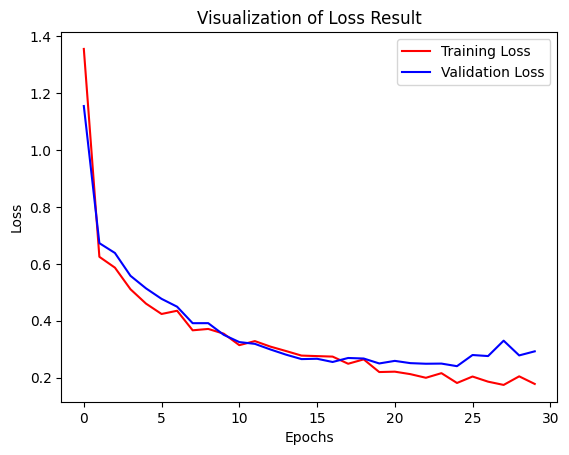

In [ ]:
#Visualisasi Loss Pertandingan Pro
epochs = [i for i in range(0,30)]
plt.plot(epochs,training_history_data['loss'],label="Training Loss",color='red')
plt.plot(epochs,training_history_data['val_loss'],label="Validation Loss",color='blue')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Loss Result")
plt.legend()
plt.show()

### **Visualisasi Akurasi**

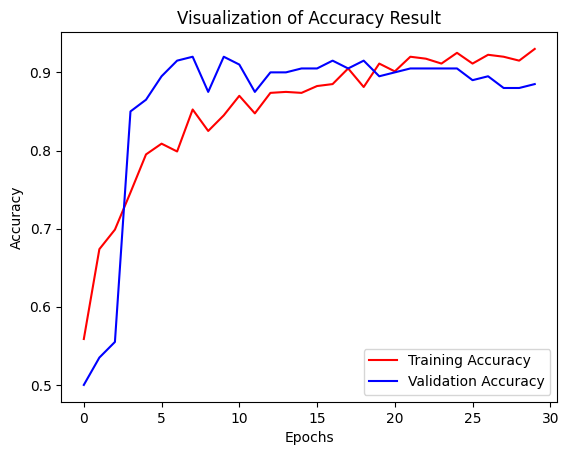

In [ ]:
#Visualisasi Akurasi Pertandingan Pro
epochs = [i for i in range(0,30)]
plt.plot(epochs,training_history_data['accuracy'],label="Training Accuracy",color='red')
plt.plot(epochs,training_history_data['val_accuracy'],label="Validation Accuracy",color='blue')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## **Confusion Matrix**

In [ ]:
y_pred = model.predict(X_val)
y_pred

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step


array([[8.95987675e-02, 9.10401285e-01],
       [9.78729784e-01, 2.12702472e-02],
       [9.87849653e-01, 1.21503863e-02],
       [9.92859185e-01, 7.14075984e-03],
       [9.67556059e-01, 3.24438550e-02],
       [2.50629574e-01, 7.49370396e-01],
       [4.17319220e-03, 9.95826840e-01],
       [2.08671913e-01, 7.91328013e-01],
       [9.69665945e-01, 3.03339977e-02],
       [8.40273440e-01, 1.59726471e-01],
       [3.71594937e-03, 9.96284068e-01],
       [3.08872491e-01, 6.91127539e-01],
       [9.46385262e-04, 9.99053657e-01],
       [9.94967937e-01, 5.03197871e-03],
       [6.68459153e-03, 9.93315339e-01],
       [9.71742332e-01, 2.82576978e-02],
       [1.86040124e-05, 9.99981344e-01],
       [9.95985448e-01, 4.01456188e-03],
       [2.02158056e-02, 9.79784310e-01],
       [9.49730575e-01, 5.02693914e-02],
       [1.71960564e-03, 9.98280406e-01],
       [9.59394097e-01, 4.06059325e-02],
       [3.58693719e-01, 6.41306281e-01],
       [9.70519662e-01, 2.94803232e-02],
       [2.925398

In [ ]:
y_pred.shape

(200, 2)

In [ ]:
predicted_categories = np.argmax(y_pred,axis=1)
predicted_categories

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0])

In [ ]:
true_categories = y_val
print("True Categories:", true_categories)

True Categories: [[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# 'smash' untuk label 0 dan 'dropshot' untuk label 1
true_labels = np.argmax(true_categories, axis=1) if len(true_categories.shape) > 1 else true_categories
pred_labels = np.argmax(predicted_categories, axis=1) if len(predicted_categories.shape) > 1 else predicted_categories

cm = confusion_matrix(true_labels, pred_labels)
print(classification_report(true_labels, pred_labels, target_names=classes))


                precision    recall  f1-score   support

   Audio Smash       0.90      0.91      0.91       100
Audio Dropshot       0.91      0.90      0.90       100

      accuracy                           0.91       200
     macro avg       0.91      0.91      0.90       200
  weighted avg       0.91      0.91      0.90       200



### **Visualisasi Confussion Matrix**

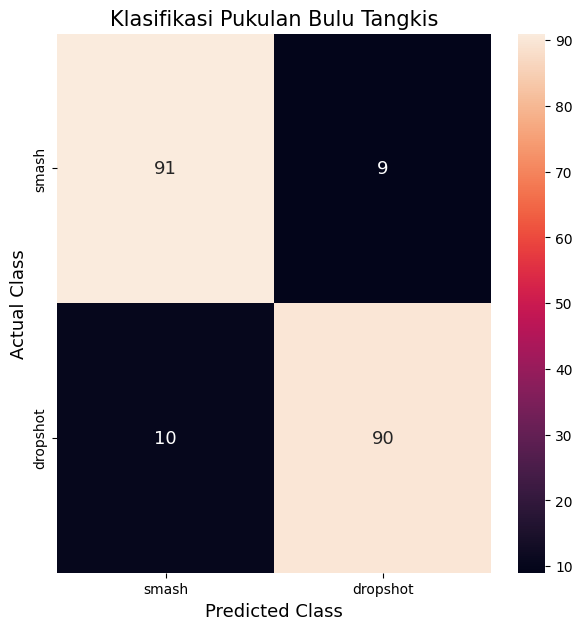

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, annot_kws={"size": 13}, xticklabels=['smash', 'dropshot'], yticklabels=['smash', 'dropshot'])
plt.xlabel("Predicted Class", fontsize=13)
plt.ylabel("Actual Class", fontsize=13)
plt.title("Klasifikasi Pukulan Bulu Tangkis", fontsize=15)
plt.show()
